In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pd.set_option('display.max_rows',None)

In [3]:
house_data = pd.read_csv('Bengaluru_House_Data.csv')

In [4]:
house_data.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


EXPLORATORY DATA ANALYSIS

In [5]:
house_data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
house_data.isnull().mean()

area_type       0.000000
availability    0.000000
location        0.000075
size            0.001201
society         0.413063
total_sqft      0.000000
bath            0.005480
balcony         0.045721
price           0.000000
dtype: float64

In [7]:
house_data.corr()['price']

bath       0.456345
balcony    0.120355
price      1.000000
Name: price, dtype: float64

In [8]:
#here balcony has correlation with price is o.12 so i think this feature not that much valuable but due to small no of feature
# i left it as it is

In [9]:
house_data.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


C:\Users\ROHIT\anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ROHIT\anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


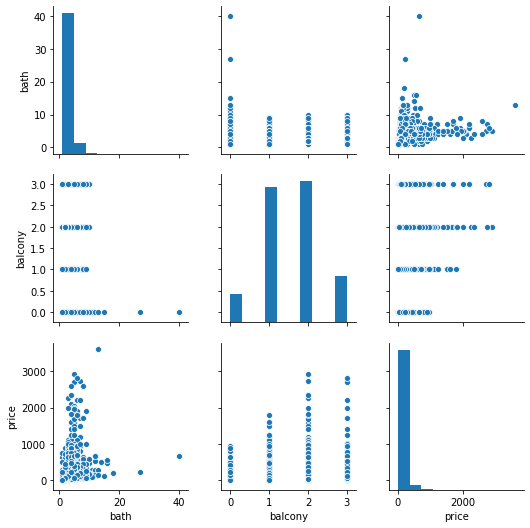

In [10]:
sns.pairplot(house_data)

DATA CLEANING

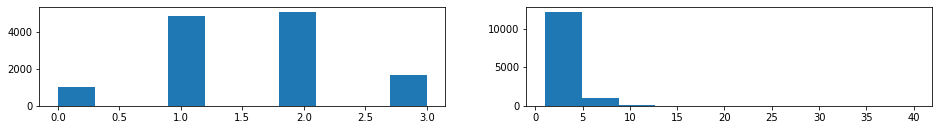

In [11]:
plt.figure(figsize=(16, 4))
plt.subplot(2,2,1,)
plt.hist(house_data.balcony)
plt.subplot(2,2,2)
plt.hist(house_data.bath)
plt.show()

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
numeric_val = house_data.select_dtypes(include=["int64", "float64",'int32'])

In [14]:
numeric_val

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00
...,...,...,...
13315,4.0,0.0,231.00
13316,5.0,NaN,400.00
13317,2.0,1.0,60.00
13318,4.0,1.0,488.00


In [15]:
imputer = SimpleImputer(strategy='mean')
numeric_val_impute = imputer.fit_transform(numeric_val)

Finding Outliers

In [16]:
numeric_val_impute = pd.DataFrame(numeric_val_impute,columns=['bath_imp','balcony_imp','price_imp'])

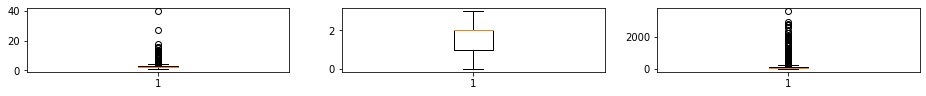

In [17]:
plt.figure(figsize=(16, 4))
plt.subplot(3,3,1)
plt.boxplot(numeric_val_impute.bath_imp)
plt.subplot(3,3,2)
plt.boxplot(numeric_val_impute.balcony_imp)
plt.subplot(3,3,3)
plt.boxplot(numeric_val_impute.price_imp)
plt.show()

In [18]:
from scipy import stats
z = np.abs(stats.zscore(numeric_val_impute))
print(z)

[[0.51775126 0.73199725 0.49337155]
 [1.72485942 1.77323081 0.04990648]
 [0.51775126 1.77323081 0.33944389]
 ...
 [0.51775126 0.73199725 0.35286977]
 [0.97732252 0.73199725 2.5202675 ]
 [1.26528816 0.73199725 0.64152608]]


In [19]:
threshold = 3
print(np.where(z > 3))

(array([    7,    45,    62,    64,    68,    85,   129,   140,   145,
         159,   193,   241,   408,   413,   434,   440,   459,   490,
         538,   605,   605,   641,   648,   677,   743,   770,   783,
         840,   855,   861,   938,  1018,  1024,  1044,  1048,  1063,
        1068,  1078,  1090,  1094,  1105,  1141,  1146,  1220,  1222,
        1234,  1299,  1299,  1311,  1314,  1352,  1379,  1400,  1405,
        1490,  1575,  1593,  1678,  1701,  1718,  1735,  1744,  1768,
        1795,  1873,  1873,  1880,  1887,  1937,  1953,  1979,  1995,
        2024,  2031,  2073,  2162,  2164,  2165,  2177,  2184,  2240,
        2286,  2341,  2400,  2439,  2439,  2519,  2552,  2620,  2620,
        2623,  2649,  2657,  2663,  2752,  2781,  2815,  2826,  2885,
        2927,  2937,  2981,  3030,  3039,  3075,  3095,  3096,  3105,
        3138,  3151,  3164,  3180,  3191,  3211,  3317,  3379,  3397,
        3425,  3437,  3440,  3460,  3511,  3523,  3527,  3539,  3609,
        3646,  3673

In [20]:
print(z[7][2])
3.375038763517309

3.2721164989295217


3.375038763517309

In [21]:
numeric_val_impute_o = numeric_val_impute[(z < 3).all(axis=1)]

In [22]:
numeric_val_impute.shape,numeric_val_impute_o.shape

((13320, 3), (12905, 3))

In [23]:
numeric_val_impute_o.isnull().sum()

bath_imp       0
balcony_imp    0
price_imp      0
dtype: int64

In [24]:
house_data_imp = pd.concat([house_data,numeric_val_impute_o],axis=1)

In [25]:
house_data_imp

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bath_imp,balcony_imp,price_imp
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2.0,1.000000,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,5.0,3.000000,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,2.0,3.000000,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3.0,1.000000,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2.0,1.000000,51.00
...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,4.0,0.000000,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,5.0,1.584376,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,2.0,1.000000,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,4.0,1.000000,488.00


In [26]:
house_data_imp = house_data_imp.drop(['bath','balcony','price'],axis=1)

In [27]:
house_data_imp

,area_type,availability,location,size,society,total_sqft,bath_imp,balcony_imp,price_imp
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.000000,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.000000,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.000000,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.000000,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.000000,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.000000,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,1.584376,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.000000,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.000000,488.00


In [28]:
house_data_imp.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath_imp         415
balcony_imp      415
price_imp        415
dtype: int64

In [29]:
cat_val = house_data.select_dtypes(include=['O'])

In [30]:
imputer2 = SimpleImputer(strategy='most_frequent')
cat_val_imp = imputer2.fit_transform(cat_val)
cat_val_impute = pd.DataFrame(cat_val_imp,columns=['area_type','availability','location','size','society','total_sqft'])
cat_val_impute

,area_type,availability,location,size,society,total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200
...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,GrrvaGr,3600
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689


In [31]:
final_house_data = pd.concat([cat_val_impute,numeric_val_impute_o],axis=1)

In [32]:
final_house_data

,area_type,availability,location,size,society,total_sqft,bath_imp,balcony_imp,price_imp
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.000000,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.000000,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.000000,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.000000,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.000000,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.000000,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,GrrvaGr,3600,5.0,1.584376,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.000000,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.000000,488.00


In [33]:
final_house_data.isnull().sum()

area_type         0
availability      0
location          0
size              0
society           0
total_sqft        0
bath_imp        415
balcony_imp     415
price_imp       415
dtype: int64

In [34]:
final_house_data.shape

(13320, 9)

In [35]:
cat_val.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [36]:
cat_val.area_type.unique(),

(array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
        'Carpet  Area'], dtype=object),)

In [37]:
cat_val.availability.unique(),

(array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
        '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
        '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
        '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
        '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
        '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
        '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
        'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
        '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
        '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
        '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
        '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
        '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
        '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object),)

In [38]:
cat_val.location.unique(),

(array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
        '12th cross srinivas nagar banshankari 3rd stage',
        'Havanur extension', 'Abshot Layout'], dtype=object),)

In [39]:
cat_val.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [40]:
cat_val.society.unique(),

(array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
       dtype=object),)

In [41]:
final_house_data.size = final_house_data['size'].apply(lambda x: x.strip()[0])

In [42]:
type(final_house_data.total_sqft)

pandas.core.series.Series

In [43]:
final_house_data.size = final_house_data['size'].astype('int64')
total_sqft_int = []
for str_val in final_house_data['total_sqft']:
    try:
        total_sqft_int.append(float(str_val)) # if '123.4' like this value in str then conver in float
    except:
        try:
            temp = []
            temp = str_val.split('-')
            total_sqft_int.append((float(temp[0])+float(temp[-1]))/2) # '123 - 534' this str value split and take mean
        except:
            
            total_sqft_int.append(np.nan) # if value not contain in above format then consider as nan
 

In [44]:
final_house_data = final_house_data.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))

In [45]:
final_house_data

,area_type,availability,location,size,society,total_sqft,bath_imp,balcony_imp,price_imp,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.000000,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.000000,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3,GrrvaGr,1440,2.0,3.000000,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.000000,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2,GrrvaGr,1200,2.0,1.000000,51.00,1200.0
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5,ArsiaEx,3453,4.0,0.000000,231.00,3453.0
13316,Super built-up Area,Ready To Move,Richards Town,4,GrrvaGr,3600,5.0,1.584376,400.00,3600.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.000000,60.00,1141.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4,SollyCl,4689,4.0,1.000000,488.00,4689.0


In [46]:
final_house_data = final_house_data.dropna()
final_house_data.isnull().sum()

area_type         0
availability      0
location          0
size              0
society           0
total_sqft        0
bath_imp          0
balcony_imp       0
price_imp         0
total_sqft_int    0
dtype: int64

In [47]:
type(final_house_data.size)

numpy.int32

In [48]:
type(final_house_data.balcony_imp)

pandas.core.series.Series

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
final_house_data_area_type = final_house_data.area_type
final_house_data_area_type = pd.get_dummies(final_house_data_area_type,drop_first=True)
final_house_data_area_type

,Carpet Area,Plot Area,Super built-up Area
0,0,0,1
1,0,1,0
2,0,0,0
3,0,0,1
4,0,0,1
...,...,...,...
13315,0,0,0
13316,0,0,1
13317,0,0,0
13318,0,0,1


In [51]:
final_house_data.area_type.value_counts()

Super built-up  Area    8685
Built-up  Area          2335
Plot  Area              1756
Carpet  Area              85
Name: area_type, dtype: int64

In [52]:
final_house_data = final_house_data.join(pd.DataFrame(final_house_data_area_type))

In [53]:
final_house_data

,area_type,availability,location,size,society,total_sqft,bath_imp,balcony_imp,price_imp,total_sqft_int,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.000000,39.07,1056.0,0,0,1
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.000000,120.00,2600.0,0,1,0
2,Built-up Area,Ready To Move,Uttarahalli,3,GrrvaGr,1440,2.0,3.000000,62.00,1440.0,0,0,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.000000,95.00,1521.0,0,0,1
4,Super built-up Area,Ready To Move,Kothanur,2,GrrvaGr,1200,2.0,1.000000,51.00,1200.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5,ArsiaEx,3453,4.0,0.000000,231.00,3453.0,0,0,0
13316,Super built-up Area,Ready To Move,Richards Town,4,GrrvaGr,3600,5.0,1.584376,400.00,3600.0,0,0,1
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.000000,60.00,1141.0,0,0,0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4,SollyCl,4689,4.0,1.000000,488.00,4689.0,0,0,1


In [54]:
final_house_data = final_house_data.drop('area_type',axis=1)
final_house_data

,availability,location,size,society,total_sqft,bath_imp,balcony_imp,price_imp,total_sqft_int,Carpet Area,Plot Area,Super built-up Area
0,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.000000,39.07,1056.0,0,0,1
1,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.000000,120.00,2600.0,0,1,0
2,Ready To Move,Uttarahalli,3,GrrvaGr,1440,2.0,3.000000,62.00,1440.0,0,0,0
3,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.000000,95.00,1521.0,0,0,1
4,Ready To Move,Kothanur,2,GrrvaGr,1200,2.0,1.000000,51.00,1200.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,5,ArsiaEx,3453,4.0,0.000000,231.00,3453.0,0,0,0
13316,Ready To Move,Richards Town,4,GrrvaGr,3600,5.0,1.584376,400.00,3600.0,0,0,1
13317,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.000000,60.00,1141.0,0,0,0
13318,18-Jun,Padmanabhanagar,4,SollyCl,4689,4.0,1.000000,488.00,4689.0,0,0,1


In [55]:
final_house_data["availability_Ready To Move"] = np.where(final_house_data["availability"]=="Ready To Move",1,0)
final_house_data.shape

(12861, 13)

In [56]:
final_house_data = final_house_data.drop('availability',axis=1)

In [57]:
location_value_count = final_house_data.location.value_counts()
location_value_count

Whitefield                 528
Sarjapur  Road             389
Electronic City            300
Kanakpura Road             271
Thanisandra                232
                          ... 
Gaundanapalya                1
Banashankari 2 nd Stage      1
Shakthi Nagar                1
Hanuman Nagar                1
 Whitefield                  1
Name: location, Length: 1261, dtype: int64

In [58]:
location_gert_20 = location_value_count[location_value_count>=20].index
location_gert_20

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road',
       'Thanisandra', 'Yelahanka', 'Uttarahalli', 'Marathahalli', 'Hebbal',
       'Raja Rajeshwari Nagar',
       ...
       'Rayasandra', 'Hoskote', 'Domlur', 'Binny Pete', 'Gunjur',
       'Poorna Pragna Layout', 'Sanjay nagar', 'Yelachenahalli', 'HBR Layout',
       'Basaveshwara Nagar'],
      dtype='object', length=146)

In [59]:
for cat_var in location_gert_20:
    final_house_data['location_'+cat_var]=np.where(final_house_data['location']==cat_var, 1,0)

In [60]:
final_house_data

,location,size,society,total_sqft,bath_imp,balcony_imp,price_imp,total_sqft_int,Carpet Area,Plot Area,...,location_Rayasandra,location_Hoskote,location_Domlur,location_Binny Pete,location_Gunjur,location_Poorna Pragna Layout,location_Sanjay nagar,location_Yelachenahalli,location_HBR Layout,location_Basaveshwara Nagar
0,Electronic City Phase II,2,Coomee,1056,2.0,1.000000,39.07,1056.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,4,Theanmp,2600,5.0,3.000000,120.00,2600.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,3,GrrvaGr,1440,2.0,3.000000,62.00,1440.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3,Soiewre,1521,3.0,1.000000,95.00,1521.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,2,GrrvaGr,1200,2.0,1.000000,51.00,1200.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Whitefield,5,ArsiaEx,3453,4.0,0.000000,231.00,3453.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,Richards Town,4,GrrvaGr,3600,5.0,1.584376,400.00,3600.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.000000,60.00,1141.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,Padmanabhanagar,4,SollyCl,4689,4.0,1.000000,488.00,4689.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
society_value_count = final_house_data.society.value_counts()

In [62]:
society_value_grt20 = society_value_count[society_value_count>=20].index
society_value_grt20

Index(['GrrvaGr', 'PrarePa', 'Sryalan', 'Prtates', 'GMown E', 'Prtanha',
       'Bhmesy ', 'Prityel', 'PrityTr', 'Prarkun', 'Dhalsh ', 'IBityin',
       'SNity S', 'Soresea', 'Soitya ', 'Bhe 2ko', 'Rosha I', 'SunceEs',
       'SNnia E', 'Adeatlm', 'JRrnauv', 'MenueNo', 'PuandHi', 'Prlla C',
       'RothaVa', 'Prncyrn', 'Aklia R', 'Puachal', 'Raard B', 'GoAirej',
       'PhestOn', 'Soazak ', 'Itelaa ', 'DLhtsnd', 'Dieldli', 'ViistLa',
       'Brnia G', 'Shitt S', 'PualeSk', 'Sodgere', 'Soiewre', 'DLhtsan',
       'SoechHa', 'RInceeg', 'Prrtht ', 'Shthi S', 'Eladero', 'Brway G',
       'AsastDe', 'DLhtsen'],
      dtype='object')

In [63]:
for cat_var in society_value_grt20:
    final_house_data['society'+cat_var]=np.where(final_house_data['society']==cat_var, 1,0)

In [64]:
final_house_data

,location,size,society,total_sqft,bath_imp,balcony_imp,price_imp,total_sqft_int,Carpet Area,Plot Area,...,societySoiewre,societyDLhtsan,societySoechHa,societyRInceeg,societyPrrtht,societyShthi S,societyEladero,societyBrway G,societyAsastDe,societyDLhtsen
0,Electronic City Phase II,2,Coomee,1056,2.0,1.000000,39.07,1056.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,4,Theanmp,2600,5.0,3.000000,120.00,2600.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,3,GrrvaGr,1440,2.0,3.000000,62.00,1440.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3,Soiewre,1521,3.0,1.000000,95.00,1521.0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Kothanur,2,GrrvaGr,1200,2.0,1.000000,51.00,1200.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Whitefield,5,ArsiaEx,3453,4.0,0.000000,231.00,3453.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,Richards Town,4,GrrvaGr,3600,5.0,1.584376,400.00,3600.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.000000,60.00,1141.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,Padmanabhanagar,4,SollyCl,4689,4.0,1.000000,488.00,4689.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
final_house_data = final_house_data.drop(['location','society','total_sqft'],axis=1)

In [66]:
final_house_data

,size,bath_imp,balcony_imp,price_imp,total_sqft_int,Carpet Area,Plot Area,Super built-up Area,availability_Ready To Move,location_Whitefield,...,societySoiewre,societyDLhtsan,societySoechHa,societyRInceeg,societyPrrtht,societyShthi S,societyEladero,societyBrway G,societyAsastDe,societyDLhtsen
0,2,2.0,1.000000,39.07,1056.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,5.0,3.000000,120.00,2600.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2.0,3.000000,62.00,1440.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3.0,1.000000,95.00,1521.0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,2,2.0,1.000000,51.00,1200.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,5,4.0,0.000000,231.00,3453.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
13316,4,5.0,1.584376,400.00,3600.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
13317,2,2.0,1.000000,60.00,1141.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13318,4,4.0,1.000000,488.00,4689.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
final_house_data.corr()['price_imp']

size              0.543265
bath_imp          0.620198
balcony_imp       0.141958
price_imp         1.000000
total_sqft_int    0.553911
                    ...   
societyShthi S   -0.024969
societyEladero    0.009475
societyBrway G    0.068236
societyAsastDe   -0.019915
societyDLhtsen   -0.020829
Name: price_imp, Length: 205, dtype: float64

In [68]:
final_house_data.to_csv('reduce_cat_class.csv', index=False) 

# Building model

In [69]:
label = final_house_data.price_imp
feature = final_house_data.drop('price_imp',axis=1)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
label_train,label_test,feature_train,feature_test = train_test_split(label,feature,test_size=0.2,random_state=42)

In [72]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
feature_train = scale.fit_transform(feature_train)
feature_test = scale.transform(feature_test)

In [73]:
from sklearn.svm import LinearSVR
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [74]:
model = LinearSVR()
model.fit(feature_train,label_train)

C:\Users\ROHIT\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [75]:
model.score(feature_test,label_test)

0.25939075812460033

In [76]:
model2 = RandomForestRegressor()
model2.fit(feature_train,label_train)

C:\Users\ROHIT\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [77]:
model2.score(feature_test,label_test)

0.6932929376901031

In [78]:
model3 = KNeighborsRegressor()
model3.fit(feature_train,label_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [79]:
model3.score(feature_test,label_test)

0.6514727752923664

In [80]:
model4 = DecisionTreeRegressor()
model4.fit(feature_train,label_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [81]:
model4.score(feature_test,label_test)

0.5030531676437813

In [82]:
model5 = GradientBoostingRegressor()
model5.fit(feature_train,label_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [83]:
model5.score(feature_test,label_test)

0.7186628332047913

In [84]:
model6 = AdaBoostRegressor()
model6.fit(feature_train,label_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [85]:
model6.score(feature_test,label_test)

0.5705808263536689

In [86]:
from sklearn.linear_model import LinearRegression
model7 = LinearRegression()
model7.fit(feature_train,label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
model7.score(feature_test,label_test)

0.5351451774747313

In [88]:
models = [model,model2,model3,model4,model5,model6,model7]
accuracy= []
for model in models:
    accuracy.append(model.score(feature_test,label_test))
    

In [89]:
accuracy

[0.25939075812460033,
 0.6932929376901031,
 0.6514727752923664,
 0.5030531676437813,
 0.7186628332047913,
 0.5705808263536689,
 0.5351451774747313]

In [90]:
#Here best model is model 5 with accuracy is around 72%

In [102]:
from joblib import dump
dump(model5, 'bangalore_house_price_prediction_model2.pkl')

['bangalore_house_price_prediction_model2.pkl']

# Hyperparameter Tunning

In [91]:
# from sklearn.model_selection import GridSearchCV
# gd = GradientBoostingRegressor()
# parameters = {'learning_rate': [0.1,0.03, 0.05, 0.07],
#               'max_depth': [4, 6, 8], 
#               'subsample': [0.7,1,0.9],
#               'n_estimators': [100,300,500]}
# model5_hp = GridSearchCV(gd,
#                         parameters,
#                         cv = 2,
#                         n_jobs = -1,
#                         verbose=True)

In [92]:
# model5_hp.fit(feature_train,label_train)

# print(model5_hp.best_score_) 
# print(model5_hp.best_params_)

In [94]:
test_df = pd.read_csv('reduce_cat_class.csv')
test_df

,size,bath_imp,balcony_imp,price_imp,total_sqft_int,Carpet Area,Plot Area,Super built-up Area,availability_Ready To Move,location_Whitefield,...,societySoiewre,societyDLhtsan,societySoechHa,societyRInceeg,societyPrrtht,societyShthi S,societyEladero,societyBrway G,societyAsastDe,societyDLhtsen
0,2,2.0,1.000000,39.07,1056.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,5.0,3.000000,120.00,2600.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2.0,3.000000,62.00,1440.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3.0,1.000000,95.00,1521.0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,2,2.0,1.000000,51.00,1200.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12856,5,4.0,0.000000,231.00,3453.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
12857,4,5.0,1.584376,400.00,3600.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
12858,2,2.0,1.000000,60.00,1141.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12859,4,4.0,1.000000,488.00,4689.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [96]:
for i, x in enumerate(test_df.columns):
    print(i,x)

0 size
1 bath_imp
2 balcony_imp
3 price_imp
4 total_sqft_int
5 Carpet  Area
6 Plot  Area
7 Super built-up  Area
8 availability_Ready To Move
9 location_Whitefield
10 location_Sarjapur  Road
11 location_Electronic City
12 location_Kanakpura Road
13 location_Thanisandra
14 location_Yelahanka
15 location_Uttarahalli
16 location_Marathahalli
17 location_Hebbal
18 location_Raja Rajeshwari Nagar
19 location_Hennur Road
20 location_Bannerghatta Road
21 location_7th Phase JP Nagar
22 location_Haralur Road
23 location_Electronic City Phase II
24 location_Chandapura
25 location_Rajaji Nagar
26 location_Bellandur
27 location_Electronics City Phase 1
28 location_KR Puram
29 location_Hoodi
30 location_Yeshwanthpur
31 location_Begur Road
32 location_Sarjapur
33 location_Kasavanhalli
34 location_Harlur
35 location_Banashankari
36 location_Hormavu
37 location_Kengeri
38 location_Jakkur
39 location_JP Nagar
40 location_Ramamurthy Nagar
41 location_Hosa Road
42 location_Varthur
43 location_Koramangala
4

In [99]:
def predict_house_price(model,size,bath_imp,balcony_imp,total_sqft_int,area_type,availability,location,society):
    

    x =np.zeros(len(test_df.columns)-1) # create zero numpy array, len = 107 as input value for model

  
    x[0]=size
    x[1]=bath_imp
    x[2]=balcony_imp
    x[3]=total_sqft_int
    

    if "availability"=="Ready To Move":
        x[8]=1

    if area_type in test_df.columns:
        area_type_index = np.where(test_df.columns==area_type)[0][0]
        x[area_type_index] =1

   
    if 'location_'+location in test_df.columns:
        loc_index = np.where(test_df.columns=="location_"+location)[0][0]
        x[loc_index] =1
        
   
        
    

   
    x = scale.transform([x])[0]

    return model.predict([x])[0] 

In [100]:
predict_house_price(model=model5, size=3,bath_imp=3,balcony_imp=2,total_sqft_int=1750,area_type="Super built-up",availability="Ready To Move",location="Devarabeesana Halli",society='PualeSk')

112.13893610674344